# SHAANTANU BHAKUNI FE-621 HW 2

QUESTION 1 and 2

In [69]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si


amzn = yf.Ticker("AMZN")
opt_maturity_dates_amzn=amzn.options
d_amzn={}
for i,x in enumerate(opt_maturity_dates_amzn):
     d_amzn["Maturity{0}".format(i)]=amzn.option_chain(x)
    
ba = yf.Ticker("BA")
opt_maturity_dates_ba=ba.options
d_ba={}
for i,x in enumerate(opt_maturity_dates_ba):
     d_ba["Maturity{0}".format(i)]=ba.option_chain(x)
     
spy = yf.Ticker("SPY")
opt_maturity_dates_spy=spy.options
d_spy={}
for i,x in enumerate(opt_maturity_dates_spy):
     d_spy["Maturity{0}".format(i)]=spy.option_chain(x)
     
     
    

def blackscholes(S, K, T, r, sigma, option='call'):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset
    d1 = (np.log(float(S) / K) + (r + 0.5 * sigma ** 2) * T) / (sigma *
         np.sqrt(T))
    d2 = (np.log(float(S) / K) + (r - 0.5 * sigma ** 2) * T) / (sigma *
         np.sqrt(T))
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S *
              si.norm.cdf(-d1, 0.0, 1.0))
    return result
#print(blackscholes(50, 100, 1, 0.0225, 0.25,'call'))

def vega (S,K,T,r,sigma):
    d1 = float(np.log(S/K))/(sigma*float(np.sqrt(T))) + float((r+ (sigma*sigma)/2)*T/(sigma*float(np.sqrt(T))))
    vega = S*float(si.norm.pdf(np.float(d1)))*float(np.sqrt(T))
    return(vega)
    
#e = 10e-15   
def newtons_method(S, K, T, r, market, x0,option='call'):
    e = float(10e-15)
    delta = blackscholes (S, K, T, r, x0, option) - market
    
    while  delta > e :
        x0 = x0 - (blackscholes(S, K, T, r, x0, option) - market)/vega (S,K,T,r,x0)
        delta = abs(blackscholes(S, K, T, r, x0, option) - market)
        return abs((float(x0)))
    

def meanIV(S,Df1,T,r,option):
    Df1["moneyness"]=S/Df1["strike"]
    #print("Implied volatility is",newtons_method(1785, 1400,0.6 , 0.0225, (437.1+440.1)/2,1))
    #moneyness is used othervise vega will be zero and imp vol will be infinity
    mask=Df1["moneyness"].between(0.95,1.05)
    
    Df1_moneyness=Df1[mask]
    
    imp_df1_all=[]
    for index, row in Df1.iterrows():
        imp_df1_all.append(newtons_method(S,row["strike"],T,r,(row["bid"]+row["ask"])/2,1,option))
    
    imp_df1_moneyness=[]
    for index, row in Df1_moneyness.iterrows():
        imp_df1_moneyness.append(newtons_method(S,row["strike"],T,r,(row["bid"]+row["ask"])/2,1,option))
        
    Df1_moneyness["IV"] = pd.Series(imp_df1_moneyness, index=Df1_moneyness.index)
    Df1["IV"] = pd.Series(imp_df1_all, index=Df1.index)

    #inthemoney_mean_Df1_moneyness=Df1_moneyness.loc[(Df1_moneyness["inTheMoney"]==True)].mean()
    #outthemoney_mean_Df1_moneyness=Df1_moneyness.loc[(Df1_moneyness["inTheMoney"]==False)].mean()
    atthemoney_mean=(Df1_moneyness.mean())["IV"]
    #print("at the money mean implied volatility is",atthemoney_mean)
    return Df1_moneyness,Df1,atthemoney_mean#(for all imp vol table)


amzn.options#6,7
ba.options#6,7
spy.options#14,16

amzn_0116_calls=d_amzn["Maturity8"][0]
amzn_0116_puts=d_amzn["Maturity8"][1]

ba_0116_calls=d_ba["Maturity8"][0]
ba_0116_puts=d_ba["Maturity8"][1]

spy_0116_calls=d_spy["Maturity18"][0]
spy_0116_puts=d_spy["Maturity18"][1]


amzn_1219_calls=d_amzn["Maturity7"][0]
amzn_1219_puts=d_amzn["Maturity7"][1]

ba_1219_calls=d_ba["Maturity7"][0]
ba_1219_puts=d_ba["Maturity7"][1]

spy_1219_calls=d_spy["Maturity16"][0]
spy_1219_puts=d_spy["Maturity16"][1]

In [54]:
amzn_0116_calls.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
98,AMZN191220C02380000,1570208931,2380.0,0.41,0.0,1.70,0.0,0.0,NaN,1,0.329963,False,REGULAR,USD
99,AMZN191220C02400000,1570209676,2400.0,0.38,0.0,1.68,0.0,0.0,1.0,1,0.336799,False,REGULAR,USD
100,AMZN191220C02540000,1569247165,2540.0,0.50,0.0,0.56,0.0,0.0,NaN,1,0.337043,False,REGULAR,USD
101,AMZN191220C02700000,1570029436,2700.0,0.25,0.0,1.59,0.0,0.0,2.0,3,0.434759,False,REGULAR,USD
102,AMZN191220C02720000,1570719649,2720.0,0.23,NaN,0.64,0.0,0.0,NaN,2,0.395270,False,REGULAR,USD


In [52]:
amzn.options#8,9
#ba.options#6,7
#spy.options#14

('2019-10-10',
 '2019-10-17',
 '2019-10-24',
 '2019-10-31',
 '2019-11-07',
 '2019-11-14',
 '2019-11-21',
 '2019-11-28',
 '2019-12-19',
 '2020-01-16',
 '2020-03-19',
 '2020-04-16',
 '2020-06-18',
 '2020-09-17',
 '2021-01-14',
 '2021-06-17',
 '2022-01-20')

In [56]:
tau=pd.Timestamp('2019-10-10')#present date
tlist=[]
for x in ba.options:
    tlist.append(pd.Timestamp(x))
tlist = [(x - tau) for x in tlist]
tlist=[x.days for x in tlist]
tlist=[x/365 for x in tlist]

In [57]:
#assignment was started on the below date and data is stored in pickle format in computer.AS only spy is needed to 
#demonstrate we will make changes of dates,S0 and r on it only
tau=pd.Timestamp('2019-10-10')#present date
tlist=[]
for x in ba.options:
    tlist.append(pd.Timestamp(x))
tlist = [(x - tau) for x in tlist]
tlist=[x.days for x in tlist]
tlist=[x/365 for x in tlist]

ATM_imp_ba_calls_1219,imp_ba_calls_1219,ATM_mean_value_ba_calls_1219 = meanIV(367.36,ba_1219_calls,tlist[8],0.0182,'call')
ATM_imp_ba_puts_1219,imp_ba_puts_1219,ATM_mean_value_ba_puts_1219=meanIV(367.36,ba_1219_puts,tlist[8],0.0182,'put')

ATM_imp_ba_calls_0116,imp_ba_calls_0116,ATM_mean_value_ba_calls_0116 = meanIV(367.36,ba_0116_calls,tlist[9],0.0182,'call')
ATM_imp_ba_puts_0116,imp_ba_puts_0116,ATM_mean_value_ba_puts_0116=meanIV(367.36,ba_0116_puts,tlist[9],0.0182,'put')



D:\pythonanaconda\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
tau=pd.Timestamp('2019-10-10')#present date
tlist=[]
for x in amzn.options:
    tlist.append(pd.Timestamp(x))
tlist = [(x - tau) for x in tlist]
tlist=[x.days for x in tlist]
tlist=[x/365 for x in tlist]
ATM_imp_amzn_calls_1219,imp_amzn_calls_1219,ATM_mean_value_amzn_calls_1219 = meanIV(1738.60,amzn_1219_calls,tlist[8],0.0182,'call')
ATM_imp_amzn_puts_1219,imp_amzn_puts_1219,ATM_mean_value_amzn_puts_1219=meanIV(1738.60,amzn_1219_puts,tlist[8],0.0182,'put')
ATM_imp_amzn_calls_0116,imp_amzn_calls_0116,ATM_mean_value_amzn_calls_0116 = meanIV(1738.60,amzn_0116_calls,tlist[9],0.0182,'call')
ATM_imp_amzn_puts_0116,imp_amzn_puts_0116,ATM_mean_value_amzn_puts_0116=meanIV(1738.60,amzn_0116_puts,tlist[9],0.0182,'put')


###########
ATM_imp_amzn_calls_0116=ATM_imp_amzn_calls_0116.head(10)
ATM_imp_amzn_puts_0116=ATM_imp_amzn_puts_0116.head(10)
ATM_imp_amzn_calls_1219=ATM_imp_amzn_calls_1219.head(10)
ATM_imp_amzn_puts_1219=ATM_imp_amzn_puts_1219.head(10)

D:\pythonanaconda\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
tau=pd.Timestamp('2019-10-10')#present date
tlist=[]
for x in amzn.options:
    tlist.append(pd.Timestamp(x))
tlist = [(x - tau) for x in tlist]
tlist=[x.days for x in tlist]
tlist=[x/365 for x in tlist]

ATM_imp_amzn_calls_1219_pred_price=[]

for index, row in ATM_imp_amzn_calls_1219.iterrows():
    ATM_imp_amzn_calls_1219_pred_price.append(blackscholes(1738.60,row["strike"],tlist[8],0.0182,row["IV"],'call'))
ATM_imp_amzn_calls_1219["PredictedPrice"]=ATM_imp_amzn_calls_1219_pred_price

ATM_imp_amzn_calls_0116_pred_price=[]

for index, row in ATM_imp_amzn_calls_0116.iterrows():
    ATM_imp_amzn_calls_0116_pred_price.append(blackscholes(1738.60,row["strike"],tlist[9],0.0182,row["IV"],'call'))
ATM_imp_amzn_calls_0116["PredictedPrice"]=ATM_imp_amzn_calls_0116_pred_price


ATM_imp_amzn_puts_1219_pred_price=[]

for index, row in ATM_imp_amzn_puts_1219.iterrows():
    ATM_imp_amzn_puts_1219_pred_price.append(blackscholes(1738.60,row["strike"],tlist[8],0.0182,row["IV"],'put'))
ATM_imp_amzn_puts_1219["PredictedPrice"]=ATM_imp_amzn_puts_1219_pred_price

ATM_imp_amzn_puts_0116_pred_price=[]

for index, row in ATM_imp_amzn_puts_0116.iterrows():
    ATM_imp_amzn_puts_0116_pred_price.append(blackscholes(1738.60,row["strike"],tlist[9],0.0182,row["IV"],'put'))
ATM_imp_amzn_puts_0116["PredictedPrice"]=ATM_imp_amzn_puts_0116_pred_price



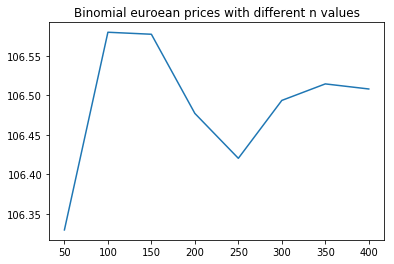

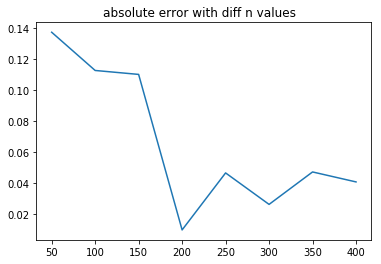

In [60]:
import numpy as np
def binomial_tree_call_put(N,T,S0,sigma,r,K,call=True, array_out=False):
    dt=T/N
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u
    p=(np.exp(r*dt)-d)/(u-d)
    
    price_tree=np.zeros([N+1,N+1])
    
    for i in range(N+1):
        for j in range(i+1):
            price_tree[j,i] = S0*(d**j)*(u**(i-j))
    
    option=np.zeros([N+1,N+1])
    if call:
        option[:,N]=np.maximum(np.zeros(N+1),price_tree[:,N]-K)
    else:
        option[:,N]=np.maximum(np.zeros(N+1),K-price_tree[:,N])
    for i in np.arange(N-1,-1,-1):
        for j in np.arange(0,i+1):
            option[j,i]=np.exp(-r*dt)*(p*option[j,i+1]+(1-p)*option[j+1,i+1])
    if array_out:
        return [option[0,0],price_tree,option]
    else:
        return option[0,0]


ATM_imp_amzn_calls_1219=ATM_imp_amzn_calls_1219[['strike','bid','ask','IV','PredictedPrice']]

ATM_imp_amzn_puts_1219=ATM_imp_amzn_puts_1219[['strike','bid','ask','IV','PredictedPrice']]

ATM_imp_amzn_calls_0116=ATM_imp_amzn_calls_0116[['strike','bid','ask','IV','PredictedPrice']]

ATM_imp_amzn_puts_0116=ATM_imp_amzn_puts_0116[['strike','bid','ask','IV','PredictedPrice']]


ATM_imp_amzn_calls_0116_pred_price=[]

for index, row in ATM_imp_amzn_calls_0116.iterrows():
    ATM_imp_amzn_calls_0116_pred_price.append(binomial_tree_call_put(200,tlist[9],1738.60,row["IV"],0.0182,row["strike"],'call'))
ATM_imp_amzn_calls_0116["Binom_Price"]=ATM_imp_amzn_calls_0116_pred_price
ATM_imp_amzn_calls_0116=ATM_imp_amzn_calls_0116[['strike','bid','ask','IV','PredictedPrice','Binom_Price']]
ATM_imp_amzn_calls_0116.head()

ATM_imp_amzn_puts_0116_pred_price=[]

for index, row in ATM_imp_amzn_puts_0116.iterrows():
    ATM_imp_amzn_puts_0116_pred_price.append(binomial_tree_call_put(200,tlist[9],1738.60,row["IV"],0.0182,row["strike"],call=False))
ATM_imp_amzn_puts_0116["Binom_Price"]=ATM_imp_amzn_puts_0116_pred_price
ATM_imp_amzn_puts_0116=ATM_imp_amzn_puts_0116[['strike','bid','ask','IV','PredictedPrice','Binom_Price']]

ATM_imp_amzn_calls_1219_pred_price=[]

for index, row in ATM_imp_amzn_calls_1219.iterrows():
    ATM_imp_amzn_calls_1219_pred_price.append(binomial_tree_call_put(200,tlist[8],1738.60,row["IV"],0.0182,row["strike"],'call'))
ATM_imp_amzn_calls_1219["Binom_Price"]=ATM_imp_amzn_calls_1219_pred_price
ATM_imp_amzn_calls_1219=ATM_imp_amzn_calls_1219[['strike','bid','ask','IV','PredictedPrice','Binom_Price']]
ATM_imp_amzn_calls_1219.head()#one month ahead maturity

ATM_imp_amzn_puts_1219_pred_price=[]

for index, row in ATM_imp_amzn_puts_1219.iterrows():
    ATM_imp_amzn_puts_1219_pred_price.append(binomial_tree_call_put(200,tlist[8],1738.60,row["IV"],0.0182,row["strike"],call=False))
ATM_imp_amzn_puts_1219["Binom_Price"]=ATM_imp_amzn_puts_1219_pred_price
ATM_imp_amzn_puts_1219=ATM_imp_amzn_puts_1219[['strike','bid','ask','IV','PredictedPrice','Binom_Price']]

def Error(df1,T,S,r,call=True):

    for i in np.arange(50,450,50):
        
        df1_pred_price=[]
        for index, row in df1.iterrows():
            
            df1_pred_price.append(binomial_tree_call_put(i,T,S,row["IV"],r,row["strike"],call))

        df1[f"Binom_Price_N{i}"]=df1_pred_price
        df1[f"errorN{i}"]=abs(df1[f"Binom_Price_N{i}"]-df1[f"PredictedPrice"])
    return df1
    
ATM_imp_amzn_calls_0116_errors=Error(ATM_imp_amzn_calls_0116,tlist[9],1738.60,0.0182,call=True)


import matplotlib.pyplot as plt
a=np.arange(50,450,50)
a=pd.DataFrame(a)

b=ATM_imp_amzn_calls_0116_errors.iloc[3:4,np.arange(-16,0,2)]#for 4th strike price in our table
b=b.transpose()
plt.title("Binomial euroean prices with different n values")
plt.plot(a,b)
plt.show()

c=ATM_imp_amzn_calls_0116_errors.iloc[3:4,np.arange(-15,0,2)]
c=c.transpose()
plt.title("absolute error with diff n values  ")
plt.plot(a,c)
plt.show()

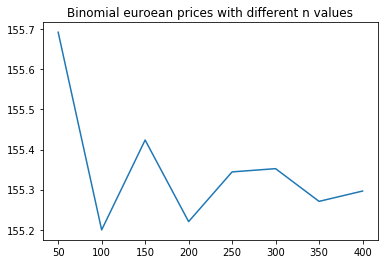

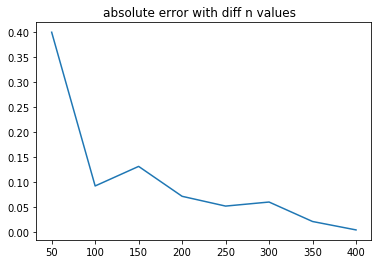

In [37]:
import matplotlib.pyplot as plt
a=np.arange(50,450,50)
a=pd.DataFrame(a)

b=ATM_imp_amzn_calls_0116_errors.iloc[0:1,np.arange(-16,0,2)]#for 1st strike price in our table
b=b.transpose()
plt.title("Binomial euroean prices with different n values")
plt.plot(a,b)
plt.show()

c=ATM_imp_amzn_calls_0116_errors.iloc[0:1,np.arange(-15,0,2)]
c=c.transpose()
plt.title("absolute error with diff n values  ")
plt.plot(a,c)
plt.show()

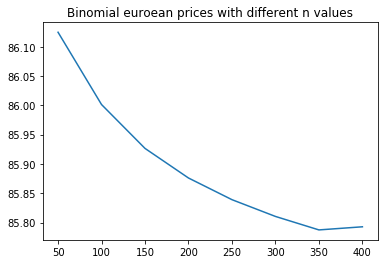

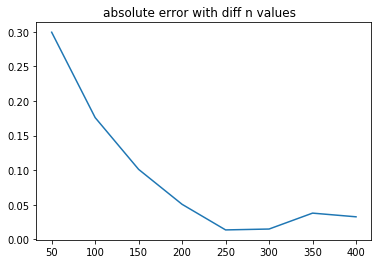

In [65]:
import matplotlib.pyplot as plt
a=np.arange(50,450,50)
a=pd.DataFrame(a)

b=ATM_imp_amzn_calls_0116_errors.iloc[9:10,np.arange(-16,0,2)]#for 9th strike price in our table
b=b.transpose()
plt.title("Binomial euroean prices with different n values")
plt.plot(a,b)
plt.show()

c=ATM_imp_amzn_calls_0116_errors.iloc[9:10,np.arange(-15,0,2)]
c=c.transpose()
plt.title("absolute error with diff n values  ")
plt.plot(a,c)
plt.show()

As could be seen for two different strike price. once the equilibrium is achieved the errors are less likely to decrease and it may increase as well.Usually 200-300 should give the equilibrium value

# Question 3 and 4

In [67]:
def ABinomial(n, S, K, r, v, t, PutCall):  
    dt = t/n 
    u = np.exp(v*np.sqrt(dt))
    d = 1./u
    p = (np.exp(r*dt)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price    
    for i in range(n-1,-1,-1):
        for j in range(i+1):
                if PutCall=="P":
                    optionvalue[i,j] = max(0, K-stockvalue[i,j], np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
                elif PutCall=="C":
                    optionvalue[i,j] = max(0, stockvalue[i,j]-K, np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
    return optionvalue[0,0]

ABinomial(200,1713 , 1900, 0.0185, 0.3, 0.3, "P")
binomial_tree_call_put(200,0.3,1713,0.3,0.0182,1900,call=False, array_out=False)
#### question 4
American_BT_pred=[]
for index, row in ATM_imp_amzn_calls_1219.iterrows():
    American_BT_pred.append(ABinomial(200,1738.60,row["strike"],0.0182,row["IV"],tlist[8],"C"))
ATM_imp_amzn_calls_1219["American_Binom_Price"]=American_BT_pred

American_BT_pred=[]
for index, row in ATM_imp_amzn_puts_1219.iterrows():
    American_BT_pred.append(ABinomial(200,1738.60,row["strike"],0.0182,row["IV"],tlist[8],"P"))
ATM_imp_amzn_puts_1219["American_Binom_Price"]=American_BT_pred
ATM_imp_amzn_puts_1219.head(10)

,strike,bid,ask,IV,PredictedPrice,Binom_Price,American_Binom_Price,American_Trinomial_Price
3,1675.0,38.30,41.65,0.233068,40.083003,40.156159,40.359259,40.254787
4,1685.0,42.90,45.75,0.232255,43.589824,43.600181,43.825803,43.820543
5,1690.0,44.95,47.60,0.230955,45.168279,45.096173,45.343948,45.382102
6,1715.0,52.25,55.90,0.216670,51.503598,51.434590,51.750705,51.810487
7,1720.0,0.00,0.00,0.024554,0.801412,0.798681,0.858021,0.852787
8,1722.5,55.25,58.95,0.214367,54.224051,54.278415,54.618286,54.523777
9,1725.0,56.30,60.00,0.213703,55.189807,55.264248,55.611416,55.488350
10,1727.5,57.30,61.05,0.212935,56.138775,56.218422,56.573926,56.475637
11,1730.0,58.40,62.15,0.212403,57.172867,57.242822,57.607393,57.534044
12,1732.5,61.45,64.45,0.217182,59.823134,59.867352,60.241753,60.194181


In [68]:
ATM_imp_amzn_calls_1219.head(10)

,strike,bid,ask,IV,PredictedPrice,Binom_Price,American_Binom_Price
0,1710.0,0.00,0.00,0.077224,44.477167,44.499842,44.499842
1,1720.0,0.00,0.00,0.059012,32.731701,32.720270,32.720270
2,1725.0,74.75,78.30,0.209512,73.545205,73.616707,73.616707
3,1740.0,0.00,0.00,0.024047,9.861687,9.869249,9.869249
4,1747.5,62.60,65.65,0.204648,60.795171,60.866630,60.866630
5,1760.0,56.15,59.30,0.202930,54.555088,54.493254,54.493254
6,1770.0,0.00,0.00,0.025007,0.844281,0.842862,0.842862
7,1775.0,0.00,0.00,0.032811,1.416286,1.411590,1.411590
8,1780.0,0.00,0.00,0.040515,2.015645,2.016132,2.016132
9,1805.0,0.00,0.00,0.077574,4.999661,4.996348,4.996348


american put is more expensive than european but call is same as european because of the arbitrage condition in non dividend paying stocks.
The prices are usually between the bid and ask prices .This could be usefull in making trades(insights)

# Ques 5

In [62]:
from scipy.stats import norm

##

class TrinomialBSModel(object):
    def __init__(self, S0=100., r=0.02, sigma=0.2, mat=1.):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat
        
    def __compute_probs(self):
        B = np.array([-1. + np.exp(self.__r * self.__h), 
                      -1. + np.exp(2. * self.__r * self.__h + self.__sigma**2 * self.__h)])
        
        d = self.__down
        u = self.__up
        
        A = np.array([[u - 1., d - 1.], 
                      [u**2 - 1., d**2 - 1.]])
        
        det = (u - 1.) * (d**2 - 1.) - (u**2 - 1.) * (d - 1.)
        invA = 1. / det * np.array([[d**2 - 1., 1. - d], 
                                    [1. - u**2, u - 1.]])
        
        res = invA.dot(B)
        
        self.__pu = res[0]
        self.__pd = res[1]
        self.__pm = 1. - self.__pu - self.__pd
        
        assert 0 <= self.__pu <= 1., 'p_u should lie in [0, 1] given %s' % self.__pu
        assert 0 <= self.__pd <= 1., 'p_d should lie in [0, 1] given %s' % self.__pd
        assert 0 <= self.__pm <= 1., 'p_m should lie in [0, 1] given %s' % self.__pm
        
    def __check_up_value(self, up):
        if up is None:
            lbda = np.sqrt(0.5 * np.pi)
            up = np.exp(lbda * self.__sigma * np.sqrt(self.__h))
            
        assert up > 0., 'up should be non negative'
        
        down = 1. / up
        assert down < up, 'up <= 1. / up = down'
                
        self.__up = up
        self.__down = down
        
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)
        
        res = np.concatenate((vec_d[::-1], [1.], vec_u))
        res *= self.__s0
        
        return res
    
    def payoff(self, stock_vec):
        raise NotImplementedError()
        
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu
            
            expectation[i] = tmp
            
        return self.__discount * expectation
        
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, 'nb_steps shoud be > 0'
        
        nb_steps = int(nb_steps)
        
        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()
        
        self.__discount = np.exp(-self.__r * self.__h)
       
        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff
        
        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)
            
        return nxt_vec_prices[0]

#we will only define american trinomial put as asked in the question    
class TrinomialBSPut(TrinomialBSModel):
    def __init__(self, S0=100., r=0.02, sigma=0.2, mat=1., K=100.):
        super(TrinomialBSPut, self).__init__(S0, r, sigma, mat)
        self.__K = K
    
    def payoff(self, s):
        return np.maximum(self.__K - s, 0.)
    
class TrinomialBSAmericanPut(TrinomialBSPut):
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        crt_payoff = self.payoff(crt_vec_stock)
        crt_prices = super(TrinomialBSAmericanPut, self).compute_current_price(crt_vec_stock, nxt_vec_prices)
        
        return np.maximum(crt_payoff, crt_prices)
    

tree = TrinomialBSAmericanPut( S0=100, r=0.02, sigma=0.2, mat=1., K=100)

print(tree.price(1000))#1000 is the number of steps



TrinomialBSAmericanPut( S0=100, r=0.02, sigma=0.2, mat=1., K=100).price(1000)

American_TT_pred=[]
for index, row in ATM_imp_amzn_puts_1219.iterrows():
    American_TT_pred.append(TrinomialBSAmericanPut(1738.60,0.0185,row["IV"],tlist[8],row["strike"]).price(200))
ATM_imp_amzn_puts_1219["American_Trinomial_Price"]=American_TT_pred
ATM_imp_amzn_puts_1219.head(10)

7.110709406948582


,strike,bid,ask,IV,PredictedPrice,Binom_Price,American_Binom_Price,American_Trinomial_Price
3,1675.0,38.30,41.65,0.233068,40.083003,40.156159,40.328269,40.254787
4,1685.0,42.90,45.75,0.232255,43.589824,43.600181,43.792999,43.820543
5,1690.0,44.95,47.60,0.230955,45.168279,45.096173,45.310460,45.382102
6,1715.0,52.25,55.90,0.216670,51.503598,51.434590,51.713033,51.810487
7,1720.0,0.00,0.00,0.024554,0.801412,0.798681,0.849624,0.852787
8,1722.5,55.25,58.95,0.214367,54.224051,54.278415,54.579099,54.523777
9,1725.0,56.30,60.00,0.213703,55.189807,55.264248,55.571764,55.488350
10,1727.5,57.30,61.05,0.212935,56.138775,56.218422,56.533811,56.475637
11,1730.0,58.40,62.15,0.212403,57.172867,57.242822,57.566796,57.534044
12,1732.5,61.45,64.45,0.217182,59.823134,59.867352,60.200558,60.194181


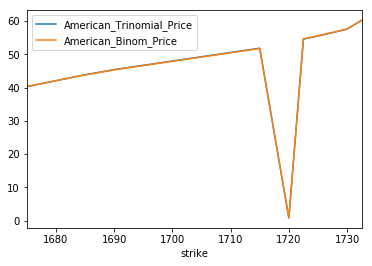

In [63]:
ATM_imp_amzn_puts_1219.plot(x='strike',y=['American_Trinomial_Price','American_Binom_Price'])

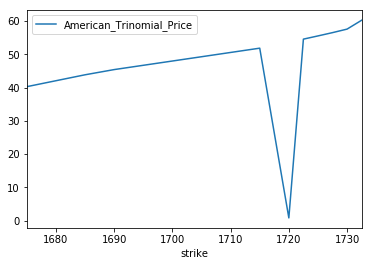

In [64]:
ATM_imp_amzn_puts_1219.plot(x='strike',y=['American_Trinomial_Price'])

one strike price has 0,0 in bid ask otherwise that curve would have been monotonically increasing.
Trinomial tree works better with less number of iteration than binomial tree